Introduccion al problema

In [1]:
# %pip install gymnasium

### Windows:

method 1

In [2]:
# %pip install swig

In [3]:
# %pip install gymnasium[box2d]

method 2

In [4]:
# %pip install swig

In [5]:
# %pip install ufal.pybox2d

In [6]:
# %pip install pygame

### Linux:

In [7]:
# %pip install gymnasium[box2d]

https://gymnasium.farama.org/environments/box2d/lunar_lander/

In [8]:
from lunar import LunarLanderEnv

Tensorflow or Torch

In [9]:
import torch


In [10]:
# Initialize the environment
lunar = LunarLanderEnv()
print(type(lunar.env.observation_space))
print(type(lunar.env.action_space))

<class 'gymnasium.spaces.box.Box'>
<class 'gymnasium.spaces.discrete.Discrete'>


El espacio de acciones es un valor del 0 al 3 que indica que acciones tomará el modulo lunar para esa iteración.

en concreto son las siguientes:

|value| action                        |
|-----|-------------------------------|
| 0   | do nothing                    |
| 1   | fire left orientation engine  |
| 2   | fire main engine              |
| 3   | fire right orientation engine |


In [11]:
lunar.env.action_space

Discrete(4)

El espacio de observaciones son un conjunto de valores flotantes y booleanos que indica el estado del modulo lunar.

en concreto son las siguientes:

|value| observation                               |
|-----|-------------------------------------------|
| 0   | coordenada X (float)                      |
| 1   | coordenada Y (float)                      |
| 2   | velocidad lineal X (float)                |
| 3   | velocidad lineal Y (float)                |
| 4   | Angulo en radianes desde -2π a +2π (float)|
| 5   | Velocidad angula (float)                  |
| 6   | Contacto de la pierna Izquierda (bool)    |
| 7   | Contacto de la pierna Derecha (bool)      |

In [12]:
# se muestran los valores minimos y maximos del espacio de observaciones.
lunar.env.observation_space

Box([ -2.5        -2.5       -10.        -10.         -6.2831855 -10.
  -0.         -0.       ], [ 2.5        2.5       10.        10.         6.2831855 10.
  1.         1.       ], (8,), float32)

In [13]:
observation_count = lunar.env.observation_space.shape[0] 
action_count = lunar.env.action_space.n

print(f"observations: {observation_count}, actions: {action_count}")

observations: 8, actions: 4


In [14]:
#valores minimos y maximos para las observaciones.
print(lunar.env.observation_space.low) 
print(lunar.env.observation_space.high)

[ -2.5        -2.5       -10.        -10.         -6.2831855 -10.
  -0.         -0.       ]
[ 2.5        2.5       10.        10.         6.2831855 10.
  1.         1.       ]


Sample ofrece una combinacion aleatoria del conjunto.

In [15]:
print(lunar.env.action_space.sample())  # Take a random action

0


In [16]:
print(lunar.env.observation_space.sample())  # Sample a random observation

[-2.4202437  -1.2396239  -6.1891484   6.229511    0.6295238  -7.037172
  0.90017235  0.9297219 ]


Running a random episode.

In [ ]:
def test_lunar_lander(steps_to_run_before_pause, agent, episodes=1):
    """
    Test the Lunar Lander environment with a given agent.
    
    Parameters:
    steps_to_run_before_pause (int): Number of steps to run before pausing for user input.
    agent: The agent to be tested in the environment.
    
    Returns:
    None
    """
    # Initialize the environment
    lunar = LunarLanderEnv(render_mode="human")
    score_total = []
    if(agent is not None):
        # Set the agent's environment
        agent.lunar = lunar
        
    for _ in range(episodes):
        counter, score = 0, 0

        while True:
            if steps_to_run_before_pause != 0 and counter % steps_to_run_before_pause == 0:
                input("Press Enter to continue...")

            if(agent is not None):
                _, reward, done, action = agent.act()
                
            else:
                # Sample a random action from the action space
                action = lunar.env.action_space.sample()
            
                # Take a step in the environment
                _, reward, done = lunar.take_action(action, verbose=True)
                
            score += reward
            
            counter += 1
            
            if done:
                print(f"Episode finished, score: {score}")
                score_total.append(score)
                break
        if(agent is not None):
            # Reset the agent's environment for the next episode
            agent.lunar.reset()
        else:
            # Reset the environment for the next episode
            lunar.reset()
    
    # Close the environment
    lunar.close()



In [18]:
test_lunar_lander(steps_to_run_before_pause=0, agent=None, episodes=1)

Step taken: 3, New state: [ 0.0101758   1.4058173   0.52105284 -0.12644084 -0.01371715 -0.15757588
  0.          0.        ], Reward: -2.0779470957206727, Done: False
Step taken: 2, New state: [ 0.0153039   1.4032161   0.5208301  -0.11569754 -0.0216415  -0.15850186
  0.          0.        ], Reward: -0.5721072172263064, Done: False
Step taken: 0, New state: [ 0.02043228  1.4000157   0.52085304 -0.14238025 -0.02956512 -0.15848759
  0.          0.        ], Reward: -1.1225834684096583, Done: False
Step taken: 1, New state: [ 0.02549658  1.3962195   0.5128037  -0.16885704 -0.03586716 -0.12605251
  0.          0.        ], Reward: -0.28157762148171517, Done: False
Step taken: 1, New state: [ 0.03047781  1.3918266   0.5023746  -0.19535135 -0.04007291 -0.08412246
  0.          0.        ], Reward: 0.0655677567681903, Done: False
Step taken: 3, New state: [ 0.03555174  1.3868272   0.51398903 -0.2223866  -0.04660862 -0.13072625
  0.          0.        ], Reward: -2.2974648019899164, Done: Fals

DQN

In [19]:
from DQN import DQNAgent
lunar = LunarLanderEnv(render_mode=None)

Train

Using device: cpu
QNetwork:
 DQN(
  (model): Sequential(
    (0): Linear(in_features=8, out_features=256, bias=True)
    (1): ReLU()
    (2): Linear(in_features=256, out_features=256, bias=True)
    (3): ReLU()
    (4): Linear(in_features=256, out_features=4, bias=True)
  )
)
Starting training...
--------------- Episode: 1/1500 | Steps:133 | Score: -376.16 | Avg Loss: 56.7853 | Epsilon: 0.995 | Q-current mean values: -0.80 | Q-target mean values: -2.61 ---------------
--------------- Episode: 2/1500 | Steps:107 | Score: -260.63 | Avg Loss: 70.5427 | Epsilon: 0.990 | Q-current mean values: -2.10 | Q-target mean values: -2.49 ---------------
--------------- Episode: 3/1500 | Steps:83 | Score: -256.74 | Avg Loss: 68.6405 | Epsilon: 0.985 | Q-current mean values: -2.42 | Q-target mean values: -2.55 ---------------
--------------- Episode: 4/1500 | Steps:110 | Score: -127.71 | Avg Loss: 105.4368 | Epsilon: 0.980 | Q-current mean values: -2.42 | Q-target mean values: -2.63 ---------------
--

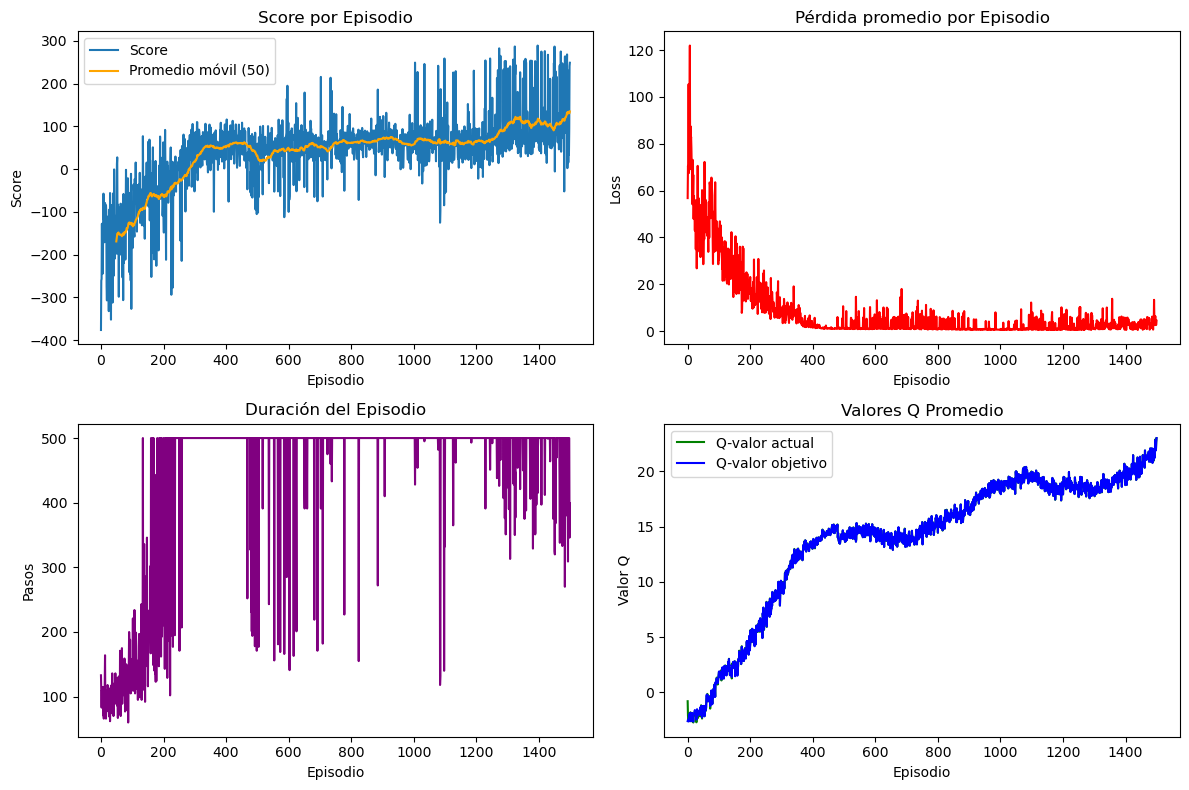

In [20]:
agent = DQNAgent(lunar)
agent.train()

Test

In [21]:
# agent with epsilon = 0.0 (no exploration)
agent = DQNAgent(lunar, epsilon=0.0)
agent.load_model("modelo_DQN.h5")

Using device: cpu
QNetwork:
 DQN(
  (model): Sequential(
    (0): Linear(in_features=8, out_features=256, bias=True)
    (1): ReLU()
    (2): Linear(in_features=256, out_features=256, bias=True)
    (3): ReLU()
    (4): Linear(in_features=256, out_features=4, bias=True)
  )
)
Model loaded from modelo_DQN.h5


In [ ]:
test_lunar_lander(steps_to_run_before_pause=25, agent=agent, episodes=1)

Episode finished, score: 245.04352047581887
Episode finished, score: 152.40000500543556
Episode finished, score: 252.76382719468003
Episode finished, score: 196.9325634095614
Episode finished, score: 139.84643612416045
Episode finished, score: 237.65429272202914
Episode finished, score: 240.01012690898966
Episode finished, score: 200.66261066059087
Episode finished, score: 221.45586581223517
Episode finished, score: 218.8127443707508
Episode finished, score: 224.3006056345656
Episode finished, score: 243.31400345726846
Episode finished, score: 205.29100744207236
Episode finished, score: 255.81487859234744
Episode finished, score: 229.12984919029623
Episode finished, score: 254.18185149224092
Episode finished, score: 13.174315868461974
Episode finished, score: 185.7864098317352
Episode finished, score: 186.54485077087276
Episode finished, score: 132.72142321407858
Episode finished, score: 250.84686277233573
Episode finished, score: 231.10573853961444
Episode finished, score: 145.3831438

REINFORCE

In [23]:
from REINFORCE import REINFORCEAgent
lunar = LunarLanderEnv(render_mode=None)

ModuleNotFoundError: No module named 'REINFORCE'

In [ ]:
# agent = REINFORCEAgent(lunar, episodes=5000)
# agent.load_model("modelo_REINFORCE.h5")

In [ ]:
agent = REINFORCEAgent(lunar)
agent.load_model("modelo_REINFORCE.h5")

e:\Discovirtual-us\IA personal\Aprendizaje por refuerzo trabajo 2024-2025\VersionAlumnos\REINFORCE.py:99: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  self.actor_net.load_s

In [ ]:
test_lunar_lander(steps_to_run_before_pause=75, agent=agent, episodes=1)

Episode finished, score: 264.42781863081314
Environment closed.
